<a href="https://colab.research.google.com/github/PriyaP-9704/Machine-Leaning-Workouts/blob/main/Bagging%2CBoosting%2COverSampling%2CUnderSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
x = data.data

In [ ]:
y = data.target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_predict = dtc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict)

0.8771929824561403

# Bagging -

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bc = BaggingClassifier(base_estimator= DecisionTreeClassifier(),n_estimators=100,random_state=3)

In [ ]:
bc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=3)

In [ ]:
accuracy_score(y_test,bc.predict(x_test))

0.9473684210526315

# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,random_state=3,learning_rate=2)

In [ ]:
abc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=2,
                   n_estimators=100, random_state=3)

In [ ]:
accuracy_score(y_test,abc.predict(x_test))

0.8771929824561403

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=50,random_state= 3,learning_rate=5)

In [ ]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=5, n_estimators=50, random_state=3)

In [ ]:
accuracy_score(y_test,gbc.predict(x_test))

0.6052631578947368

accuracy_score(y_test,abc.predict(x_test))

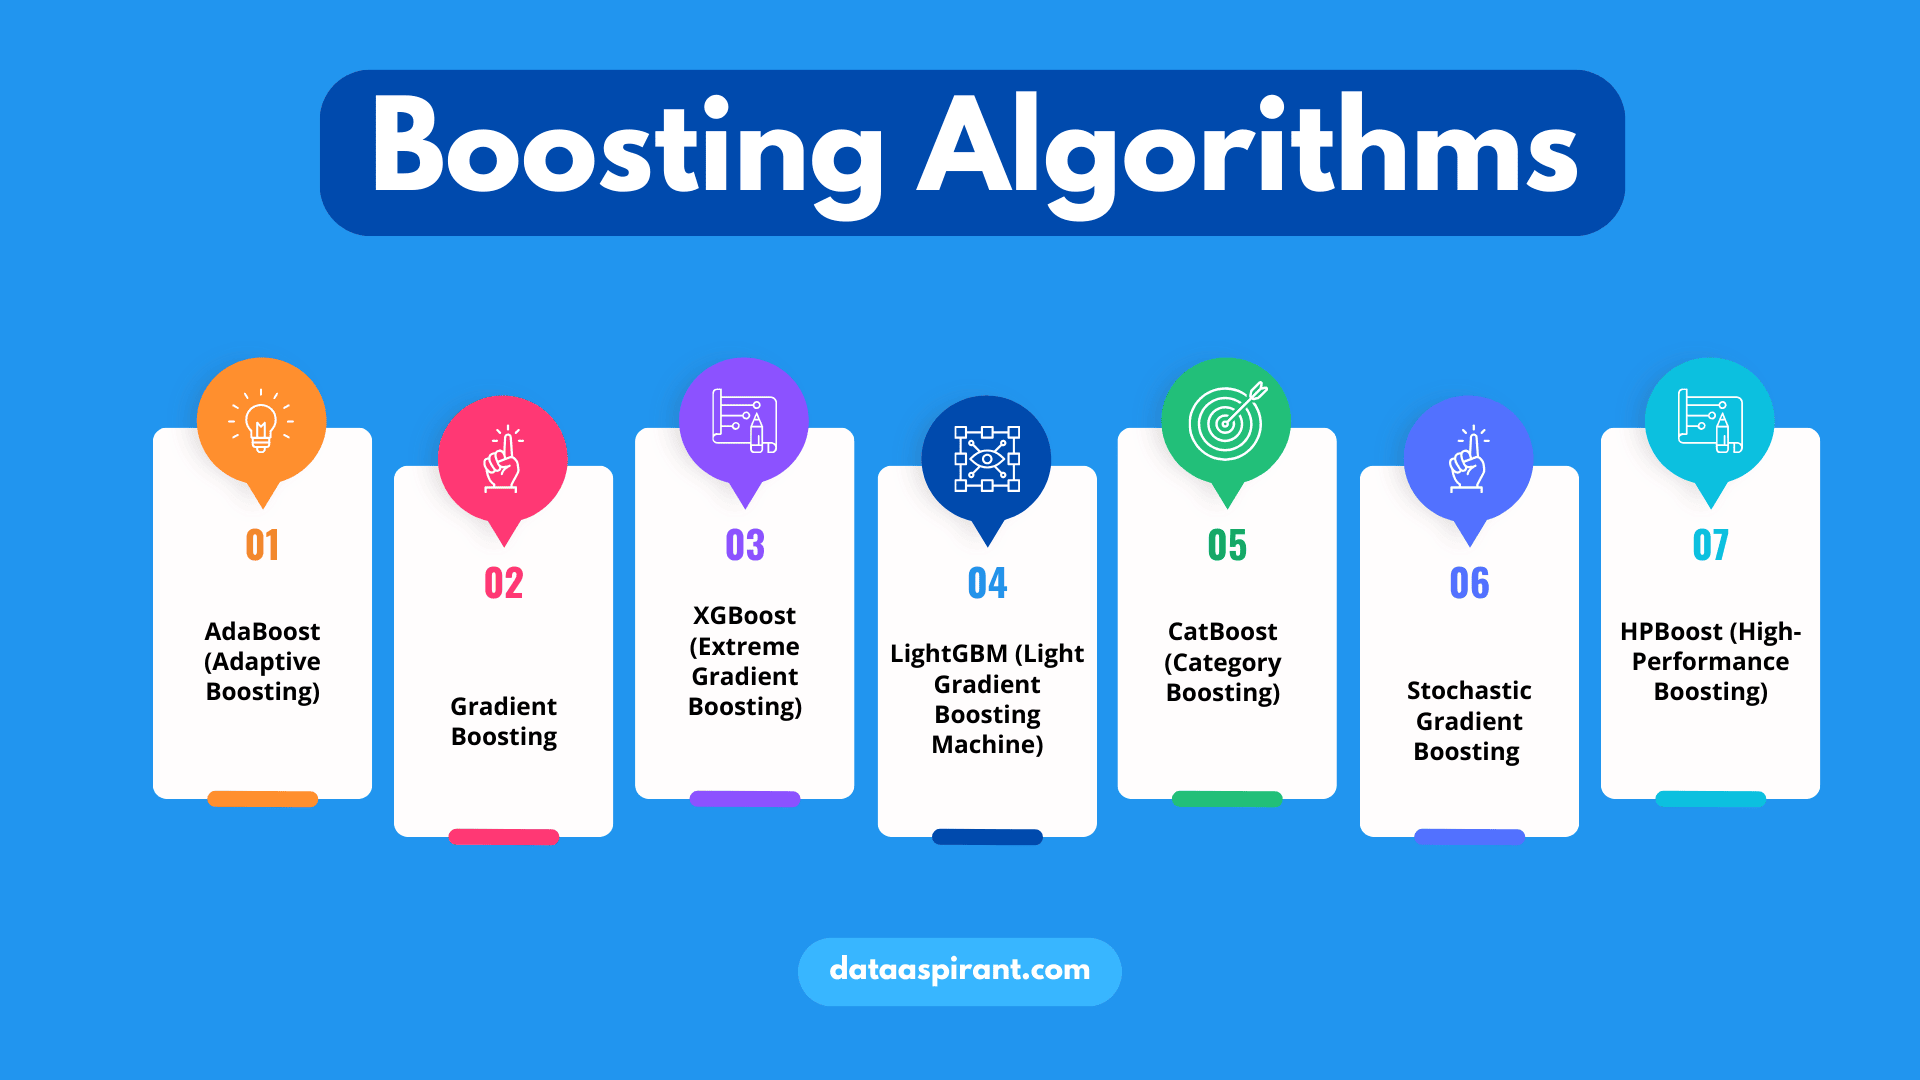

# Oversampling

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df = pd.read_csv('/content/MOCK_DATA.csv')
df

,id,first_name,last_name,email,gender,repay
0,1,Minne,Kitchen,mkitchen0@harvard.edu,Non-binary,1
1,2,Avie,Barszczewski,abarszczewski1@cdc.gov,Female,1
2,3,Ariadne,Hammerson,ahammerson2@imdb.com,Female,0
3,4,Alix,Russo,arusso3@google.cn,Male,1
4,5,Roxane,Somerville,rsomerville4@tinypic.com,Female,1
...,...,...,...,...,...,...
995,996,Rania,Brockhurst,rbrockhurstrn@php.net,Female,0
996,997,Lorita,Sisselot,lsisselotro@wufoo.com,Female,0
997,998,Richmond,Hainey`,rhaineyrp@wix.com,Male,1
998,999,Marylou,Sorrill,msorrillrq@vistaprint.com,Female,1


In [30]:
df.repay.value_counts()

repay
1    669
0    331
Name: count, dtype: int64

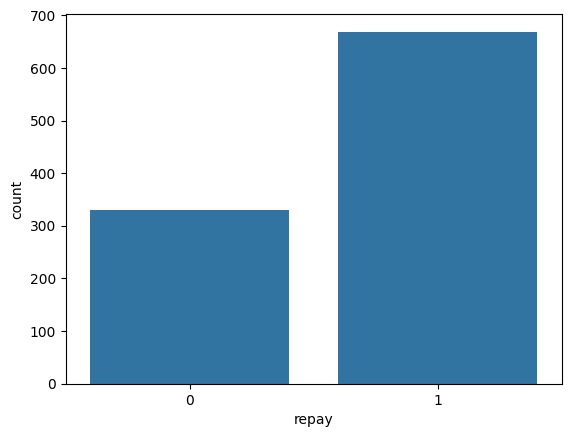

In [31]:
sns.countplot(x = 'repay',data =  df)
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [36]:
categorical_features = ['first_name','last_name','email','gender']

In [37]:
df[categorical_features] = df[categorical_features].apply(le.fit_transform)

In [38]:
df

,id,first_name,last_name,email,gender,repay
0,1,657,486,671,6,1
1,2,70,55,5,2,1
2,3,50,393,28,2,0
3,4,25,789,64,5,1
4,5,779,845,836,2,1
...,...,...,...,...,...,...
995,996,751,129,800,2,0
996,997,574,829,620,2,0
997,998,764,388,816,5,1
998,999,620,847,703,2,1


In [50]:
x = df.drop('repay',axis= 1).values
y = df['repay']

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 5)

In [52]:
x_train.shape

(800, 5)

In [53]:
x_test.shape

(200, 5)

In [54]:
from imblearn.over_sampling import RandomOverSampler

In [55]:
ros = RandomOverSampler()

In [56]:
ros_x_train,ros_y_train = ros.fit_resample(x_train,y_train)

In [57]:
print(y_train.shape)
print(ros_y_train.shape)

(800,)
(1070,)


In [58]:
print(y_train.value_counts())
print(ros_y_train.value_counts())

repay
1    535
0    265
Name: count, dtype: int64
repay
1    535
0    535
Name: count, dtype: int64


#SMOTE - OVER SAMPLING

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
sm = SMOTE()